In [2]:
import pandas as pd

In [3]:
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

In [4]:
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv(r'C:\Users\ZarasAndreas\Documents\Documents\Courses Taught by Me\Forecasting Course_FINAL\FINAL\Course Presentations\Python\sales_data_add_wes - Python.csv')
df=df.set_index("Date")
df

,Sales
Date,
01/01/1984,20
01/04/1984,12
01/07/1984,10
01/10/1984,18
01/01/1985,23
01/04/1985,14
01/07/1985,13
01/10/1985,22
01/01/1986,28


<AxesSubplot:xlabel='Date'>

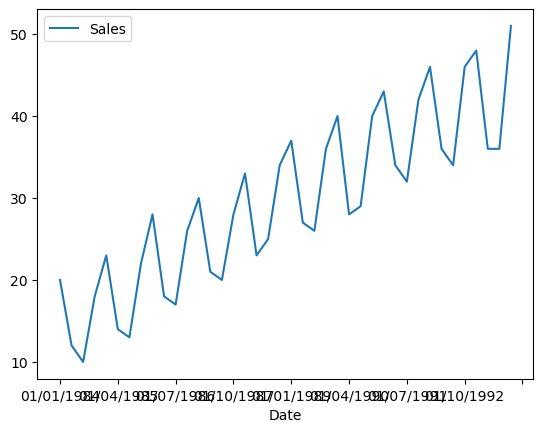

In [6]:
df.plot()

In [7]:
model = ExponentialSmoothing(df,trend='add',seasonal='add',seasonal_periods=4).fit(smoothing_trend=0.11,smoothing_level=0.2,smoothing_seasonal=0.3)

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [8]:
model.summary()

Dep. Variable:,Sales,No. Observations:,40
Model:,ExponentialSmoothing,SSE,60.378
Optimized:,True,AIC,32.470
Trend:,Additive,BIC,45.981
Seasonal:,Additive,AICC,40.056
Seasonal Periods:,4,Date:,"Mon, 30 Jan 2023"
Box-Cox:,False,Time:,20:33:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.2000000,alpha,False
smoothing_trend,0.1100000,beta,False


<AxesSubplot:xlabel='Date'>

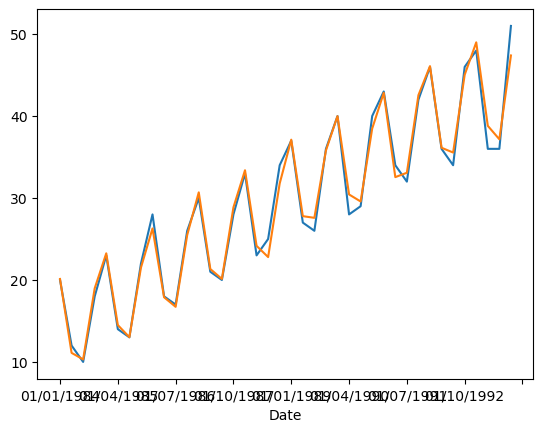

In [9]:
fitted_values=model.fittedvalues
df_series=df.squeeze()
df_series.plot()
fitted_values.plot()

In [10]:
model = ExponentialSmoothing(df,trend='add',seasonal='add',seasonal_periods=4).fit()
model.summary()

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Dep. Variable:,Sales,No. Observations:,40
Model:,ExponentialSmoothing,SSE,52.769
Optimized:,True,AIC,27.082
Trend:,Additive,BIC,40.593
Seasonal:,Additive,AICC,34.668
Seasonal Periods:,4,Date:,"Mon, 30 Jan 2023"
Box-Cox:,False,Time:,20:33:09
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,1.4901e-08,alpha,True
smoothing_trend,1.2538e-09,beta,True


In [11]:
forecast = model.forecast(4)
forecast

C:\Users\ZarasAndreas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


40    51.754866
41    40.846592
42    40.129626
43    51.927702
dtype: float64

<AxesSubplot:xlabel='Date'>

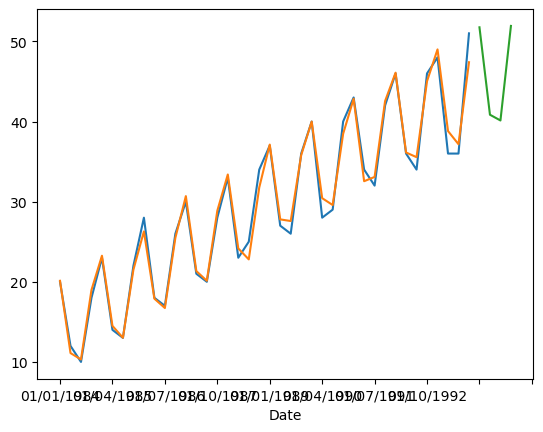

In [12]:
df_series.plot()
fitted_values.plot()
forecast.plot()